In [1]:
!pip install easyocr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 27.8 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

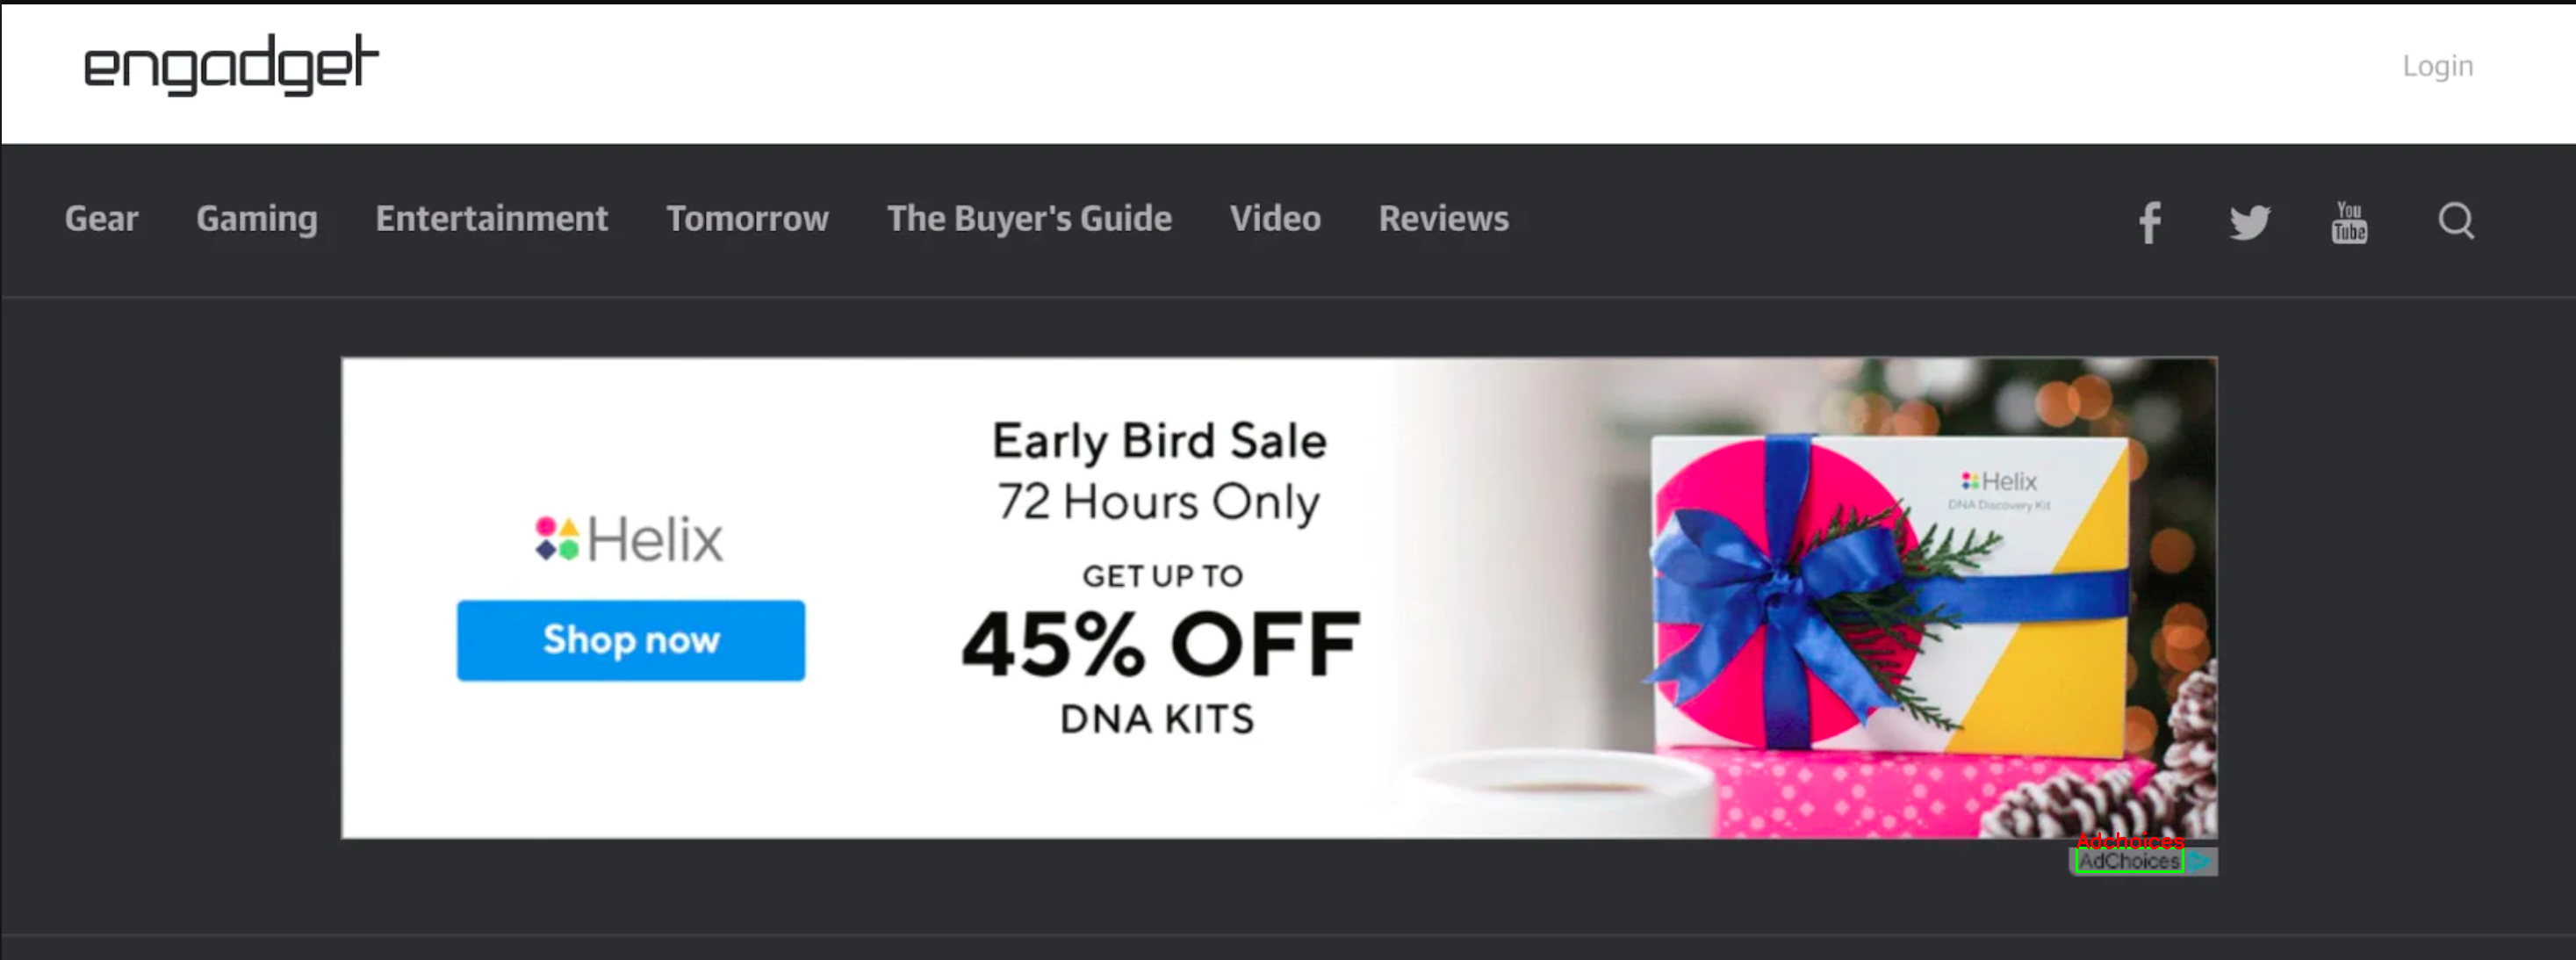

In [2]:
import cv2
import easyocr
from google.colab.patches import cv2_imshow

def detect_and_draw_boxes(image_path):
    image = cv2.imread(image_path)
    reader = easyocr.Reader(['en'], gpu=True)
    results = reader.readtext(image_path)
    ad_keywords = ["ad", "ads", "advert", "advertisement", "sponsored","affiliate" , "affiliated","promotion",
                   "sponsored content","native advertising","sponsored post","ad space"]
    for (bbox, text, prob) in results:
        if any(keyword in text.lower() for keyword in ad_keywords):
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = tuple(map(int, top_left))
            bottom_right = tuple(map(int, bottom_right))
            cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
            cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

image_path = '/content/banner.png'
detect_and_draw_boxes(image_path)
